In [14]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams.update({'font.size': 11})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [6]:
dt=40.0
dx=500
u=10
CFL=u*dt/dx; print(CFL)

0.8


In [7]:
ds=xr.open_dataset('../outputs/data/EulerBackward_dt%s_CFL%s_dx%s_profilegauss_nr10.0_numerical.nc'%(dt,CFL,dx))['conc_unids']

## 1D

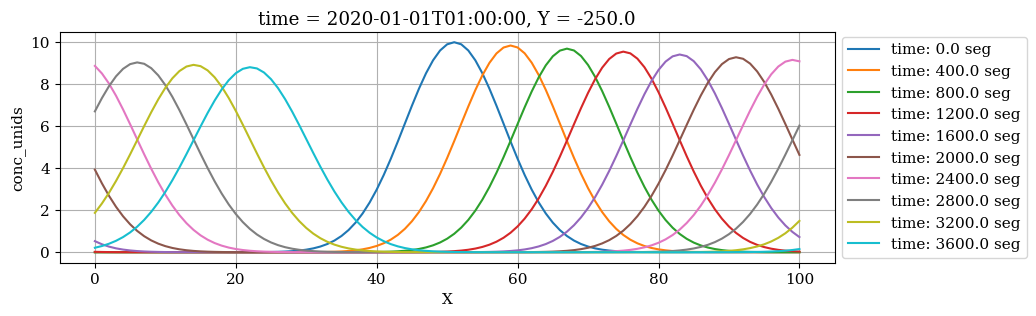

In [34]:
plt.figure(figsize=(10,3))
for ti in np.arange(0,100,10):
    ds[ti,0].plot(label='time: %s seg'%(ti*dt))
plt.grid()
plt.legend(ncol=1,bbox_to_anchor=(1, .5), loc='center left', borderaxespad=.5)
plt.show()

## 2D

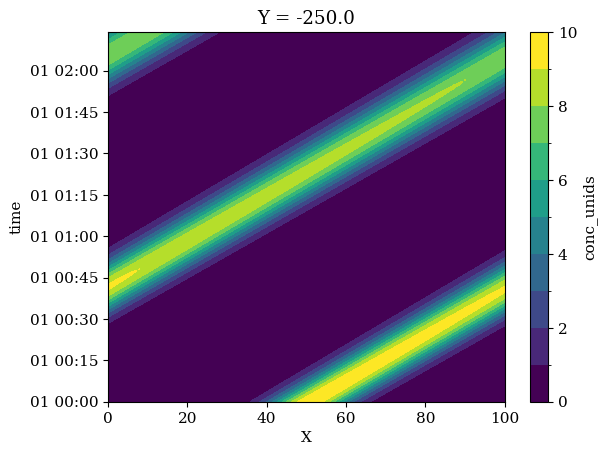

In [12]:
ds[:,0].plot.contourf(levels=11)

## 3D

In [35]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap

In [36]:
nlevel=[-12, -10, -8, -6, -4, -3, -2, -1.5, -1.2, -0.9, -0.6, -0.4, -0.2, 
        -0.1, -0.05,0.05,0.1, 0.2, 0.4, 0.6, 0.9, 1.2, 1.5, 2, 3, 4, 6, 8, 10, 12]
original_cmap = plt.get_cmap('coolwarm') #RdBu_r #bwr
colors = original_cmap(np.linspace(0, 1, 256))
mid_point = len(colors) // 2
colors[mid_point - 1 : mid_point + 1] = [0, 0, 0, 1]  # Negro (RGBA)
custom_cmap = LinearSegmentedColormap.from_list('custom_bwr', colors)

In [37]:
ti=5
dx=500
ds_t0 = ds.isel(time=ti) 
val_lim=25
metodo='Eule Backward'

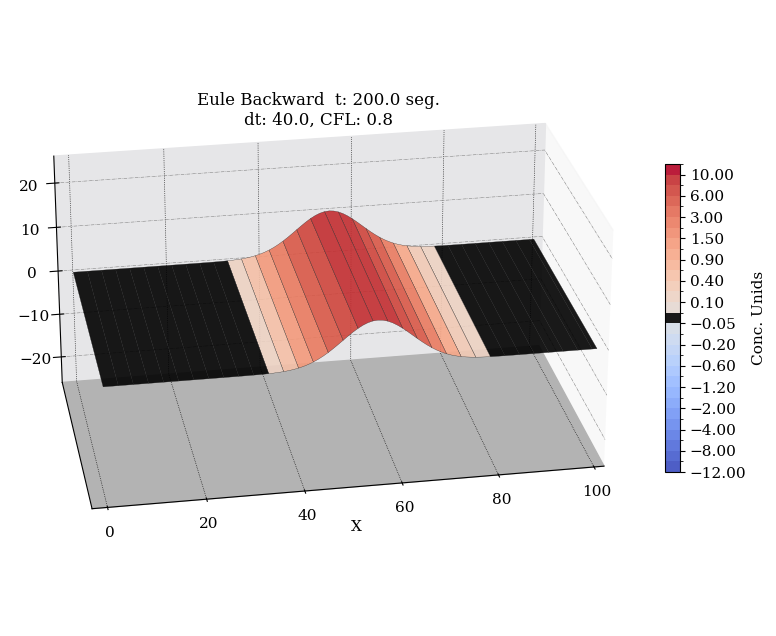

In [38]:
# Crear figura 3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
# Obtener coordenadas de latitud y longitud
lon = ds_t0.X.values
lat = ds_t0.Y.values
# Crear una malla 2D para el plot 3D
lon_grid, lat_grid = np.meshgrid(lon, lat)
# Obtener los valores de la variable en t=0
data = ds_t0.values  # Forma (lat, lon)
data[data > val_lim] = np.nan
data[data < -val_lim] = np.nan
ax.view_init(elev=25, azim=-100) 
ax.set_box_aspect([2, 1.1, 1])
# Graficar superficie 3D
norm = BoundaryNorm(boundaries=nlevel, ncolors=256)
# Superficie con paleta 'Spectral' y niveles
surf = ax.plot_surface(lon_grid, lat_grid, data,cmap=custom_cmap, norm=norm,
                       edgecolor='.1', alpha=0.9,lw=.2,)
ax.autoscale(enable=False)
ax.set_zlim(-val_lim,val_lim)
ax.set_xlim(-1, 100)
ax.set_ylim(-dx/2,dx/2)
# Añadir barra de colores
fig.colorbar(surf, ax=ax, shrink=0.5, label='Conc. Unids',ticks=nlevel[::2])
# Etiquetas de ejes
ax.set_xlabel('X')
ax.set_yticks([])
ax.xaxis._axinfo["grid"].update({'color': 'k', 'linestyle': ':', 'alpha': 0.2,'linewidth':.5})
ax.zaxis._axinfo["grid"].update({'color': '.5', 'linestyle': '-.', 'alpha': 0.1,'linewidth':.39})
ax.set_title('%s  t: %s seg.\ndt: %s, CFL: %s'%(metodo,ti*dt,dt,CFL),y=.87,fontsize=12)
# --- Cambiar el color de fondo del espacio 3D ---
ax.zaxis.set_pane_color((0.7, 0.7, 0.7, 1.0))  # Fondo del plano YZ (lon)
ax.yaxis.set_pane_color((0.9, 0.9, 0.91, 1.0)) # Fondo del plano XY (altura)